# Upload data

In [0]:
# upload 'legislators-historical.csv' and 'diets.csv' to the VM on which Colab runs

from google.colab import files

files.upload()

Saving legislators-historical.csv to legislators-historical.csv


{'legislators-historical.csv': b'last_name,first_name,middle_name,suffix,nickname,full_name,birthday,gender,type,state,district,senate_class,party,url,address,phone,contact_form,rss_url,twitter,facebook,youtube,youtube_id,bioguide_id,thomas_id,opensecrets_id,lis_id,fec_ids,cspan_id,govtrack_id,votesmart_id,ballotpedia_id,washington_post_id,icpsr_id,wikipedia_id\r\nBassett,Richard,,,,,1745-04-02,M,sen,DE,,2,Anti-Administration,,,,,,,,,,B000226,,,,,,401222,,,,507,Richard Bassett (politician)\r\nBland,Theodorick,,,,,1742-03-21,M,rep,VA,9,,,,,,,,,,,,B000546,,,,,,401521,,,,786,Theodorick Bland (congressman)\r\nBurke,Aedanus,,,,,1743-06-16,M,rep,SC,2,,,,,,,,,,,,B001086,,,,,,402032,,,,1260,Aedanus Burke\r\nCarroll,Daniel,,,,,1730-07-22,M,rep,MD,6,,,,,,,,,,,,C000187,,,,,,402334,,,,1538,Daniel Carroll\r\nClymer,George,,,,,1739-03-16,M,rep,PA,-1,,,,,,,,,,,,C000538,,,,,,402671,,,,1859,George Clymer\r\nContee,Benjamin,,,,,,M,rep,MD,3,,,,,,,,,,,,C000710,,,,,,402834,,,,2010,Benjamin Contee\r\nDalton

In [0]:
# load the uploaded CSV into a pandas data frame

import pandas as pd

leg = pd.read_csv('legislators-historical.csv', 
                  usecols=['first_name', 'gender', 'type', 'state', 'party', 
                           'birthday', 'last_name'])

In [0]:
leg.head()

,last_name,first_name,birthday,gender,type,state,party
0,Bassett,Richard,1745-04-02,M,sen,DE,Anti-Administration
1,Bland,Theodorick,1742-03-21,M,rep,VA,NaN
2,Burke,Aedanus,1743-06-16,M,rep,SC,NaN
3,Carroll,Daniel,1730-07-22,M,rep,MD,NaN
4,Clymer,George,1739-03-16,M,rep,PA,NaN


# Wide transformations

In [0]:
# apply takes a function name or a lambda expression that operates on a subtable
leg.groupby('state').apply(lambda df: df.shape[0]).head(3)

state
AK     16
AL    206
AR    117
dtype: int64

In [0]:
# here we filter on the states that have at least two senators from the independent party
leg.groupby('state').apply(lambda df: df[df['party'] == 'Independent'].shape[0] > 2).sample(3)

state
FL    False
AS    False
NH    False
dtype: bool

# Homework

### Exercise 2.1: Show the number of states with at least 10 female senators

Solution

In [0]:
# first, create a function that will act on a subtable of rows for a specific state
def get_number_of_female_senators(subtable):
  return subtable[subtable['gender'] == 'F'].shape[0]

In [0]:
# we can test this function on the subtable for e.g. California

ca_subtable = leg.groupby('state').get_group('CA')
ca_subtable.head(3)

,last_name,first_name,birthday,gender,type,state,party
2650,Gilbert,Edward,NaN,M,rep,CA,Democrat
2742,Wright,George,1816-06-04,M,rep,CA,Independent
2747,Frémont,John,1813-01-21,M,sen,CA,Democrat


In [0]:
get_number_of_female_senators(ca_subtable)

23

In [0]:
# we can confirm this is the correct count by manually counting the females
ca_subtable[ca_subtable['gender'] == 'F'].shape[0]

23

In [0]:
# now we can apply the function to each group subtable
num_females_by_state = leg.groupby('state').apply(get_number_of_female_senators)

num_females_by_state.head(3)

state
AK    0
AL    3
AR    5
dtype: int64

In [0]:
# lastly, filter on the states with at least 10 senators
num_females_by_state[num_females_by_state >= 10]

state
CA    23
FL    12
IL    13
NY    20
dtype: int64

### Exercise 2.2: Count the average number of senators per state with missing party ('NaN')

Solution

In [0]:
leg.groupby('state').apply(lambda subtable: subtable['party'].isna().sum()).mean()

4.0344827586206895

### Exercise 2.3: Show the states with less than 10 senators

Solution

In [0]:
leg.groupby('state').count()

,last_name,first_name,birthday,gender,type,party
state,,,,,,
AK,16,16,16,16,16,14
AL,206,206,197,206,206,206
AR,117,117,114,117,117,115
AS,2,2,2,2,2,2
AZ,48,48,48,48,48,48
CA,361,361,358,361,361,361
CO,90,90,90,90,90,90
CT,240,240,238,240,240,227
DC,2,2,2,2,2,2


In [0]:
leg.groupby('state')['state'].count()

state
AK      16
AL     206
AR     117
AS       2
AZ      48
CA     361
CO      90
CT     240
DC       2
DE      97
DK       9
FL     155
GA     309
GU       4
HI      23
IA     202
ID      59
IL     486
IN     341
KS     141
KY     373
LA     197
MA     426
MD     305
ME     175
MI     294
MN     160
MO     333
MS     155
MT      52
NC     354
ND      44
NE     127
NH     181
NJ     359
NM      54
NV      56
NY    1461
OH     674
OK      92
OL       2
OR      89
PA    1053
PI      13
PR      19
RI     107
SC     251
SD      51
TN     299
TX     256
UT      53
VA     432
VI       4
VT     115
WA      95
WI     196
WV     120
WY      40
Name: state, dtype: int64

In [0]:
senator_count = leg.groupby('state')['state'].count()
senator_count[senator_count < 10]

state
AS    2
DC    2
DK    9
GU    4
OL    2
VI    4
Name: state, dtype: int64

# Exploratory and inferential statistics

In [0]:
import pandas as pd    

# Load data
lib = pd.read_csv('libido.csv')

In [0]:
# Each row corresponds to a person. Each column corresponds:
# - age group (18-30, 30-45, 45-60) (independent variable, IV)
# - a drug dose (IV)
# - the measured libido (outcome / dependent variable, DV)
lib.sample(4)

,age_group,dose,libido
11,45-65,3,4
3,30-45,1,1
6,18-30,2,2
5,45-65,2,5


In [0]:
# Recoding value from numeric to string for convenience
lib['dose'].replace({1: 'placebo', 2: 'low', 3: 'high'}, inplace=True)

lib.sample(5)

,age_group,dose,libido
13,18-30,high,3
10,45-65,high,7
0,18-30,placebo,3
9,45-65,low,3
4,18-30,placebo,4


In [0]:
lib['dose'] == 'placebo'

0      True
1      True
2      True
3      True
4      True
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
Name: dose, dtype: bool

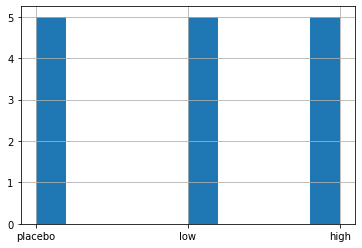

In [0]:
# create a histogram of the doses to see their distribution
# this shows that the group sizes are equal

lib['dose'].hist()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


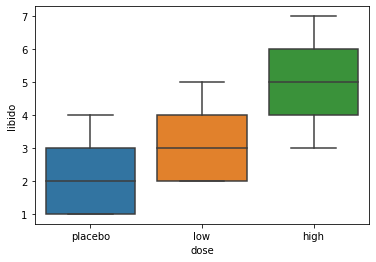

In [0]:
# create a box plot (aka box-and-whisker plot) of libido vs. dose
# each box corresponds to the 1st quartile, median and 3rd quartile of the data
# the whiskers include all points within 1.5 times the inter-quartile range; 
# as we see we do not have many outliers

import seaborn as sns

sns.boxplot(data=lib, x='dose', y='libido')

## two-sample t-test

In [0]:
lib.sample(10)

,age_group,dose,libido,placebo
0,18-30,1,3,False
3,30-45,1,1,False
1,30-45,1,2,False
9,45-65,2,3,False
6,18-30,2,2,False
4,18-30,1,4,False
10,45-65,3,7,False
2,30-45,1,1,False
5,45-65,2,5,False
8,18-30,2,2,False


In [0]:
# Before we get to ANOVA, do a t-test of placebo vs. any dose
# create a new column named 'placebo' for this

lib['placebo'] = lib['dose'] == 'placebo'
lib.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,age_group,dose,libido,placebo
0,18-30,1,3,False
1,30-45,1,2,False
2,30-45,1,1,False
3,30-45,1,1,False
4,18-30,1,4,False


In [0]:
ttest_ind(
    lib.loc[lib['dose'] == 'placebo', 'libido'], 
    lib.loc[lib['dose'] != 'placebo', 'libido'])

In [0]:
# Do the t test
# null hypothesis: the average libido is the same in the placebo / non-placebo group
# alternative hypothesis: the averages are different

from scipy.stats import ttest_ind

# the second output attribute 'pvalue' is below 0.05 meaning that if the averages
# were the same (drug has no effect), a dataset as extreme as this one is unlikely
# (less than 5% probability)
# this alone does NOT tell us that the drug causes a higher / lower libido 
# (we can infer that from the study design though)
ttest_ind(lib.loc[lib['placebo'], 'libido'], lib.loc[~lib['placebo'], 'libido'])

Ttest_indResult(statistic=-2.221442204498801, pvalue=0.04469997916031026)

Side note: the assumptions for a t test are:
- one discrete (categorial) independent variable with two levels (check - we used 'placebo')
- one continuous (metric) dependent variable (check - we used 'libido')
- independent samples (check - each person appears in one or the other group not both)
- the dependent variable is normally distributed within each group (we didn't check but could have used the Shapiro-Wilks test or a Q-Q plot)
- homoscedasticity: variances are equal within each group (we didn't check but could have used Levene's test for equality) 



In [0]:
# if the variances are unequal, we could have used Welch's t-test:

ttest_ind(lib.loc[lib['placebo'], 'libido'], lib.loc[~lib['placebo'], 'libido'], 
          equal_var=False)

Ttest_indResult(statistic=-2.4195152518746497, pvalue=0.0357190765601339)

# One-way ANOVA

In [0]:
# One-way ANOVA:
# use the original levels of the variable 'dose' for this

import scipy.stats as stats

# one-way ANOVA using scipy
stats.f_oneway(lib['libido'][lib['dose'] == 'high'], 
             lib['libido'][lib['dose'] == 'low'],
             lib['libido'][lib['dose'] == 'placebo'])

# the p-value is less than 5%, indicating that there is a significant 
# difference in means between at least two groups; i.e. dose has some
# effect on libido, although it is not clear in what way exactly:
# is there a significant increase / decrease from low dose to high dose?
# or from placebo to low dose? for that we would have to use a post hoc test 
# (most commonly Tukey's test for pairwise differences)

In [0]:
from statsmodels.formula.api import ols

# as an alternative to scipy, do ANOVA using statsmodels
results = ols('libido ~ C(dose)', data=lib).fit()
results.summary()

# this gives much more information and does additional tests on the model assumptions
# Prob (F-statistic) is the p-value and less than 5% => significant

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 libido   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     5.119
Date:                Fri, 08 May 2020   Prob (F-statistic):             0.0247
Time:                        14:17:23   Log-Likelihood:                -24.683
No. Observations:                  15   AIC:                             55.37
Df Residuals:                      12   BIC:                             57.49
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              5.0000      0.627      7.972      0.000       3.634       6.366
C(dose)[T.low]        -1.8000      0.887     -2.029      0.065      -3.732       0.132
C(dose)[T.placebo]    -2.8000      0.887     -3.157      0.008      -4.732      -0.868
==============================================================================
Omnibus:                        2.517   Durbin-Watson:                   2.408
Prob(Omnibus):                  0.284   Jarque-Bera (JB):                1.108
Skew:                           0.195   Prob(JB):                        0.575
Kurtosis:                       1.727   Cond. No.                         3.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
import statsmodels.api as sm

# to get more information, we can take a look at the ANOVA table
# the column gives us the variance explained by the variable dose (20.133)
# and the unsystematic variance (23.6) that cannot be explained by dose, 
# i.e. due to individual differences or other factors
# In total we can explain about 40% of the total variance: R^2 = 20.133 / (20.133 + 23.6)

aov_table = sm.stats.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(dose),20.133333,2.0,5.118644,0.024694
Residual,23.600000,12.0,NaN,NaN


# Two-way ANOVA

In [0]:
# for a two-way ANOVA we use a model that includes two IVs, dose and age group
# the result shows that there is no significant difference between groups;
# this is because the ANOVA has to account for false positives which are more
# common the more IVs and levels are in the data
ols('libido ~ C(dose)*C(age_group)', lib).fit().summary()

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1755: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 libido   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     3.448
Date:                Fri, 08 May 2020   Prob (F-statistic):             0.0513
Time:                        14:17:40   Log-Likelihood:                -21.284
No. Observations:                  15   AIC:                             54.57
Df Residuals:                       9   BIC:                             58.82
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                    4.5000      0.913      4.930      0.001       2.435       6.565
C(dose)[T.low]                              -1.8333      1.179     -1.556      0.154      -4.499       0.833
C(dose)[T.placebo]                          -1.0000      1.291     -0.775      0.458      -3.920       1.920
C(age_group)[T.30-45]                       -1.0833      0.589     -1.838      0.099      -2.416       0.250
C(age_group)[T.45-65]                        0.8333      1.179      0.707      0.497      -1.833       3.499
C(dose)[T.low]:C(age_group)[T.30-45]      4.187e-16   1.66e-16      2.530      0.032    4.43e-17    7.93e-16
C(dose)[T.placebo]:C(age_group)[T.30-45]    -1.0833      0.589     -1.838      0.099      -2.416       0.250
C(dose)[T.low]:C(age_group)[T.45-65]         0.5000      1.667      0.300      0.771      -3.270       4.270
C(dose)[T.placebo]:C(age_group)[T.45-65]          0          0        nan        nan           0           0
==============================================================================
Omnibus:                        2.149   Durbin-Watson:                   2.778
Prob(Omnibus):                  0.341   Jarque-Bera (JB):                1.106
Skew:                           0.281   Prob(JB):                        0.575
Kurtosis:                       1.794   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Exercise: t-test, one-way and two-way ANOVA with different dataset

In [0]:
# Load data set: each row represents a person that followed one of
# several diets for 6 weeks; age, gender, height and weight before and after 
# were recorded
diet = pd.read_csv('diets.csv')
diet.head()

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,25,,41,171,60,2,60.0
1,26,,32,174,103,2,103.0
2,1,0,22,159,58,1,54.2
3,2,0,46,192,60,1,54.0
4,3,0,55,170,64,1,63.3


**Task 1:** Create a new column 'weight_loss' which is the difference of pre.weight and weight6weeks. This will be our DV


In [0]:
diet['weight_loss'] = diet['weight6weeks'] - diet['pre.weight']
diet.head()

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks,weight_loss
0,25,,41,171,60,2,60.0,0.0
1,26,,32,174,103,2,103.0,0.0
2,1,0,22,159,58,1,54.2,-3.8
3,2,0,46,192,60,1,54.0,-6.0
4,3,0,55,170,64,1,63.3,-0.7


**Task 2:** Create one histogram for gender and another one for height

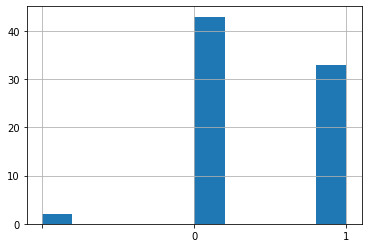

In [0]:
# some data is missing, otherwise the groups are pretty even
diet['gender'].hist()

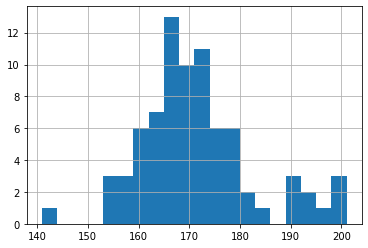

In [0]:
# height distribution is slightly skewed towards large values
diet['Height'].hist(bins=20)

**Task 3:** Create one box plot for weight loss by gender and one by diet


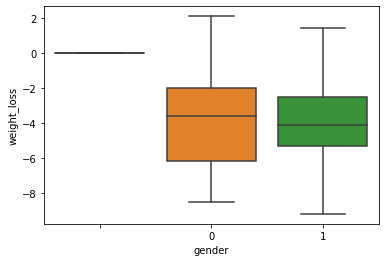

In [0]:
import seaborn as sns

# we see that gender does not seem to have an overall effect on weight loss; 
# however the distribution is much wider for one gender than for the other one
sns.boxplot(data=diet, x='gender', y='weight_loss')

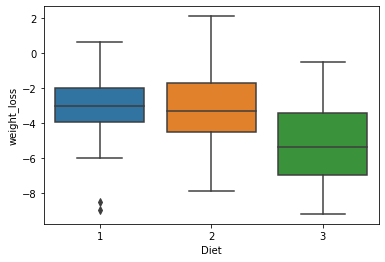

In [0]:
# we see that:
# - there are some outliers for diet 1 (large weight gain after following the diet)
# - diet 2 seems to lead to more weight loss than diet 3
# - no systematic difference between diet 1 and 2
sns.boxplot(data=diet, x='Diet', y='weight_loss')

**Task 4:** Do a one-way ANOVA for weight loss vs. diet




In [0]:
# the p-value of 0.3% shows that there is a significant difference in weight 
# loss between at least two of the groups
ols('weight_loss ~ C(Diet)', data=diet).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            weight_loss   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     6.197
Date:                Fri, 08 May 2020   Prob (F-statistic):            0.00323
Time:                        18:09:43   Log-Likelihood:                -177.27
No. Observations:                  78   AIC:                             360.5
Df Residuals:                      75   BIC:                             367.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -3.3000      0.489     -6.750      0.000      -4.274      -2.326
C(Diet)[T.2]     0.2741      0.672      0.408      0.684      -1.064       1.613
C(Diet)[T.3]    -1.8481      0.672     -2.751      0.007      -3.187      -0.510
==============================================================================
Omnibus:                        0.064   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.968   Jarque-Bera (JB):                0.230
Skew:                          -0.036   Prob(JB):                        0.891
Kurtosis:                       2.744   Cond. No.                         3.87
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Task 5:** Do a two-way ANOVA for weight loss vs. diet and gender

In [0]:
# the p-value is around 0.1% which shows there is a significant difference in 
# means when using two independent variables / factors as well
ols('weight_loss ~ C(Diet)*C(gender)', data=diet).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            weight_loss   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     3.929
Date:                Fri, 08 May 2020   Prob (F-statistic):            0.00190
Time:                        18:09:45   Log-Likelihood:                -172.05
No. Observations:                  78   AIC:                             358.1
Df Residuals:                      71   BIC:                             374.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -1.1140      0.887     -1.255      0.213      -2.883       0.655
C(Diet)[T.2]                    1.1140      0.887      1.255      0.213      -0.655       2.883
C(Diet)[T.3]                   -1.1378      0.435     -2.615      0.011      -2.005      -0.270
C(gender)[T.0]                 -1.9360      0.956     -2.026      0.047      -3.842      -0.030
C(gender)[T.1]                 -2.5360      0.982     -2.583      0.012      -4.494      -0.578
C(Diet)[T.2]:C(gender)[T.0]    -0.6711      1.080     -0.621      0.536      -2.824       1.482
C(Diet)[T.3]:C(gender)[T.0]    -1.6922      0.658     -2.571      0.012      -3.005      -0.380
C(Diet)[T.2]:C(gender)[T.1]    -1.5731      1.134     -1.388      0.170      -3.834       0.688
C(Diet)[T.3]:C(gender)[T.1]     0.5544      0.716      0.774      0.442      -0.874       1.983
==============================================================================
Omnibus:                        1.632   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.442   Jarque-Bera (JB):                1.030
Skew:                          -0.065   Prob(JB):                        0.597
Kurtosis:                       3.548   Cond. No.                     2.07e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.4e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Homework

In [0]:
import seaborn as sns

iris = sns.load_dataset("iris")

These are measurements for flowers of different species. We're gonna see if the species is a good predictor for sepal_length.

In [0]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**TODO** Your task: Run an ANOVA with species as the IV and sepal_length as the DV. How do you interpret the results?


As we can see, the results from our one way ANOVA show us: 
- The Probability of our F-statistic / our p-value is very close to 0.
- Therefore, we can conclude, that there is a significant link between sepal_length and species. 
- The species seems to have a big impact on the sepal_length

In [0]:
from statsmodels.formula.api import ols
results = ols("sepal_length~C(species)", data=iris).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sepal_length   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     119.3
Date:                Wed, 20 May 2020   Prob (F-statistic):           1.67e-31
Time:                        08:18:40   Log-Likelihood:                -111.73
No. Observations:                 150   AIC:                             229.5
Df Residuals:                     147   BIC:                             238.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    5.0060      0.073     68.762      0.000       4.862       5.150
C(species)[T.versicolor]     0.9300      0.103      9.033      0.000       0.727       1.133
C(species)[T.virginica]      1.5820      0.103     15.366      0.000       1.379       1.785
==============================================================================
Omnibus:                        1.188   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.552   Jarque-Bera (JB):                0.785
Skew:                           0.119   Prob(JB):                        0.675
Kurtosis:                       3.263   Cond. No.                         3.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##Task 2: 
Using `anova_lm?` from the `statsmodels` package, print the variance explained by the model above and the residual variance. How much % of the total variance of the DV `sepal_length` can be explained by the IV `species`?

As it turns out:
- the variance explained by the variable species is (63.212133)`
- and the unsystematic variance (38.956200) that cannot be explained by the species, 

`In total we can explain is about 61,87% of the total variance: R^2 = 63.212133 / (63.212133 + 38.956200)`

In [0]:
import statsmodels.api as sm

aov_table = sm.stats.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(species),63.212133,2.0,119.264502,1.669669e-31
Residual,38.956200,147.0,NaN,NaN


##Task 3: 
Transform the variable `petal_width` into a categorial variable `petal_width_cat` using the `qcut` function from the `pandas` package. Specifically, transform the petal width measurements into three distinct bins "low", "medium" and "high".

In [0]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [0]:
iris["petal_width_cat"]= pd.qcut(iris["petal_width"], 3,["low","medium","high"])
iris

,sepal_length,sepal_width,petal_length,petal_width,species,petal_width_cat
0,5.1,3.5,1.4,0.2,setosa,low
1,4.9,3.0,1.4,0.2,setosa,low
2,4.7,3.2,1.3,0.2,setosa,low
3,4.6,3.1,1.5,0.2,setosa,low
4,5.0,3.6,1.4,0.2,setosa,low
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,high
146,6.3,2.5,5.0,1.9,virginica,high
147,6.5,3.0,5.2,2.0,virginica,high
148,6.2,3.4,5.4,2.3,virginica,high


##Task 4
Run a two-way ANOVA on ```sepal_length``` (DV) using the independent variables ```species``` and ```petal_width_cat```. How do you interpret the results?


As we can see, the results from our one way ANOVA show us: 
- The Probability of our F-statistic / our p-value is very close to 0.
- Therefore, we can conclude, that there is a significant link between the DV (sepal_length) and the IVs (species and petal_width_cat). 
- The species and petal_width seem to have a big impact on the sepal_length

To find out what effect they have, we would need to run a post-hoc test.

In [0]:
results2= ols("sepal_length~C(species)*C(petal_width_cat)", data=iris).fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sepal_length   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     59.88
Date:                Wed, 20 May 2020   Prob (F-statistic):           9.05e-30
Time:                        08:53:41   Log-Likelihood:                -110.89
No. Observations:                 150   AIC:                             231.8
Df Residuals:                     145   BIC:                             246.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept                                                 5.0060      0.073     68.672      0.000       4.862       5.150
C(species)[T.versicolor]                                  0.3895      0.105      3.712      0.000       0.182       0.597
C(species)[T.virginica]                                   0.6507      0.081      8.010      0.000       0.490       0.811
C(petal_width_cat)[T.medium]                              0.4229      0.081      5.212      0.000       0.262       0.583
C(petal_width_cat)[T.high]                                0.6174      0.105      5.879      0.000       0.410       0.825
C(species)[T.versicolor]:C(petal_width_cat)[T.medium]     0.1024      0.097      1.051      0.295      -0.090       0.295
C(species)[T.virginica]:C(petal_width_cat)[T.medium]      0.3204      0.132      2.423      0.017       0.059       0.582
C(species)[T.versicolor]:C(petal_width_cat)[T.high]       0.2871      0.175      1.636      0.104      -0.060       0.634
C(species)[T.virginica]:C(petal_width_cat)[T.high]        0.3303      0.098      3.381      0.001       0.137       0.523
==============================================================================
Omnibus:                        1.325   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.515   Jarque-Bera (JB):                0.908
Skew:                           0.107   Prob(JB):                        0.635
Kurtosis:                       3.315   Cond. No.                     6.52e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.3e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

##Task 5 
(No coding, just text answer) What kind of test can you use after a two-way ANOVA to get more insight into the results? For instance, what kind of test can be used to say which of the variables ```species``` and ```petal_width_cat``` are good predictors?

We could conducta Bonferroni correction
We take our alpha level and divide by the number of tests. (It is the simplest most conservative approach, but it could increase type 2 errors)

Other ways of finding the differences without increasing type 2 differences are the following:
- `Tukeys Honestly Significant Difference (HSD)`

For unequal sample size use:
- `Gabriel's` (small n)
- `Hochberg's GT2` (large n)

For unequal variances use:
- `Games-Howell`